In [153]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statistics

1.Загрузить файл hr.csv.

In [151]:
data=pd.read_csv('HR.csv')

2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [154]:
data.agg([statistics.mean, statistics.median,min, max, np.std])

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
median,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,sales,low
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,IT,high
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,technical,medium
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN


In [156]:
data.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


3.Рассчитать и визуализировать корреляционную матрицу для переменных.

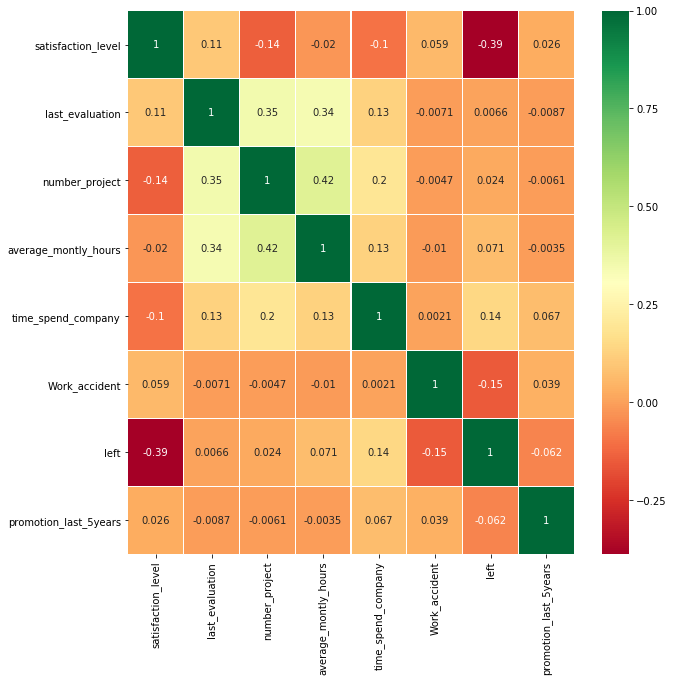

In [157]:
sns.heatmap(data.corr(),annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

4.Визуализировать несколько взаимосвязей между переменными.

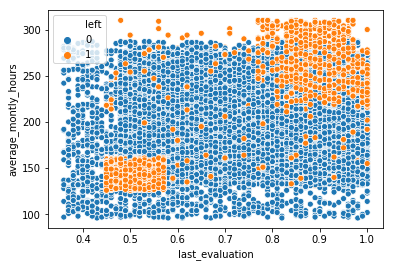

In [158]:
sns.scatterplot(x='last_evaluation', y='average_montly_hours',hue='left',data=data)
plt.show()

Можно выделить два явных кластера среди уволенных сотрудников: группа с высокой оценкой и перерабатывающие, и группа, работавшая мало и с низкой оценкой. Можно предположить, что первые ушли сами(устали/схантили другие компании), а вторых уволили за лентяйство.

5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [159]:
active=data[data['left']==0]['satisfaction_level']
left=data[data['left']==1]['satisfaction_level']
stats.ttest_ind(active,left)

Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)

In [160]:
num_projects=data['number_project'].unique()
    
proj2 = data[data['number_project']==2]['last_evaluation']
proj3 = data[data['number_project']==3]['last_evaluation']
proj4 = data[data['number_project']==4]['last_evaluation']
proj5 = data[data['number_project']==5]['last_evaluation']
proj6 = data[data['number_project']==6]['last_evaluation']
proj7 = data[data['number_project']==7]['last_evaluation']

stats.f_oneway(proj2,proj3,proj4,proj5,proj6,proj7)

F_onewayResult(statistic=582.1016323224225, pvalue=0.0)

6.Рассчитать сколько работников работает в каждом департаменте.

In [161]:
data[data['left']==0][['left','sales']].groupby('sales').count()

,left
sales,
IT,954
RandD,666
accounting,563
hr,524
management,539
marketing,655
product_mng,704
sales,3126
support,1674


7.Показать распределение сотрудников по зарплатам.

Text(0.5,1,'all')

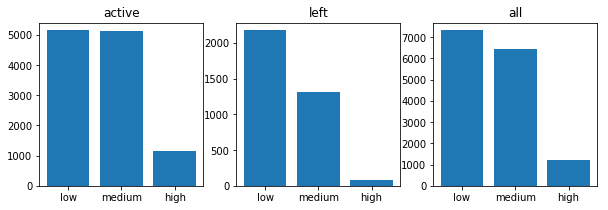

In [162]:
salary_all=data['salary'].value_counts().reset_index()
salary_active=data[data['left']==0]['salary'].value_counts().reset_index()
salary_left=data[data['left']==1]['salary'].value_counts().reset_index()
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (10, 3))
ax1.bar(salary_active['index'], salary_active['salary'])
ax1.set_title('active')
ax2.bar(salary_left['index'], salary_left['salary'])
ax2.set_title('left')
ax3.bar(salary_all['index'], salary_all['salary'])
ax3.set_title('all')


8.Показать распределение сотрудников по зарплатам совместно с департаментами.

In [163]:
all_emp=data[['salary','sales','left']].groupby(['sales','salary']).count().unstack()
active_emp=data[data['left']==0][['salary','sales','left']].groupby(['sales','salary']).count().unstack()
left_emp=data[['salary','sales','left']].groupby(['sales','salary']).sum().unstack()

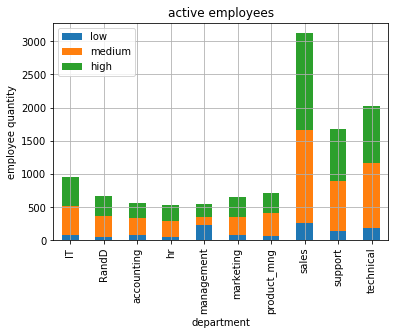

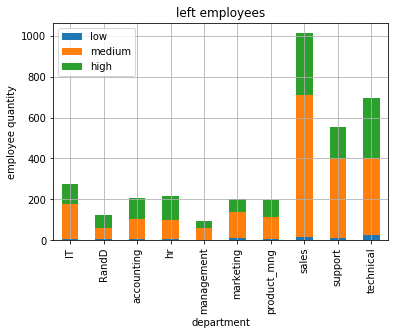

In [164]:
ax1=active_emp.plot(kind='bar', stacked=True, label='emp')
plt.title('active employees')
ax2=left_emp.plot(kind='bar', stacked=True)
plt.title('left employees')
for ax in (ax1,ax2):
    ax.grid()
    ax.legend(data['salary'].unique())
    ax.set_xlabel('department')
    ax.set_ylabel('employee quantity')
plt.show()

9.Сколько сотрудников покинули компанию.

In [165]:
data[data['left']==1]['left'].count()

3571

10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [ ]:
left=data[data['left']==1]
sns.scatterplot(x='last_evaluation', y='satisfaction_level', data=left)